# An example of using candex with rotated Latitude and Longitude (every grid has it own lat and lon)
## Remapping of CONUS WRF to subbasins of South Saskatchewan River at Medicine Hat, Alberta, Canada.

In [3]:
# loading candex
from candex.candex import candex

# initializing candex object
cndx = candex()

# specifying candex objects
# name of the case; the temporary, remapping and remapped file names include case name
cndx.case_name                = 'WRF_Medicine_Hat'
# temporary path that the candex generated GIS files and remapped file will be saved
cndx.temp_dir                 = '../temporary/'
# name of target shapefile that the source netcdf files should be remapped to
cndx.sink_shp                 = '../data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
# name of netCDF file(s); multiple files can be specified with *
cndx.source_nc                = '../data/Source_nc_WRF/WRF*.nc'
# name of variables from source netCDF file(s) to be remapped
cndx.var_names                = ['T2']
# name of variable longitude in source netCDF files
cndx.var_lon                  = 'XLONG'
# name of variable latitude in source netCDF files
cndx.var_lat                  = 'XLAT'
# name of variable time in source netCDF file; should be always time
cndx.var_time                 = 'time'
# location where the remapped netCDF file will be saved
cndx.output_dir               = '../output/'
# format of the variables to be saved in remapped files,
# if one format provided it will be expanded to other variables
cndx.format_list              = ['f4']
# fill values of the variables to be saved in remapped files,
# if one value provided it will be expanded to other variables
cndx.fill_value_list          = ['-9999.00']
# if exists and uncommented candex will use this remapping info and skip GIS tasks
#cndx.remap_csv                = '../temporary/WRF_Medicine_Hat_remapping.csv'

# execute candex
cndx.run_candex()



no  author name is provide and the author name is changes to (author name)!
candex detects that target shapefile is in WGS84 (epsg:4326)
candex detects that no field for ID is provided in sink/target shapefile
arbitarary values of ID are added in the field ID_t
candex detects that no field for latitude is provided in sink/target shapefile
latitude values are added in the field lat_t
candex detects that no field for longitude is provided in sink/target shapefile
longitude values are added in the field lon_t
it seems everything is OK with the sink/target shapefile; added to candex object sink_shp_gpd
candex will save standard shapefile for candex claculation as:
../temporary/WRF_Medicine_Hat_sink_shapefile.shp


/Users/shg096/opt/anaconda3/lib/python3.8/site-packages/candex/candex.py:239: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['lat_t']  = shp.centroid.y # centroid lat from target
/Users/shg096/opt/anaconda3/lib/python3.8/site-packages/candex/candex.py:246: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['lon_t']  = shp.centroid.x # centroid lon from target


candex detects that the varibales from the netCDF files are identicalin dimensions of the varibales and latitude and longitude
candex detects that all the varibales have dimensions of:
['time', 'y', 'x']
candex detects that the longitude varibales has dimensions of:
['y', 'x']
candex detects that the latitude varibales has dimensions of:
['y', 'x']
candex detects case 2 - rotated lat/lon
candex is creating the shapefile from the netCDF file and saving it here:
../temporary/WRF_Medicine_Hat_source_shapefile.shp
-120.75228881835938 46.88842582702637 -108.13016128540039 53.99990463256836
candex decides the netCDF file has longtitude values of -180 to 180; creating the extended


/Users/shg096/opt/anaconda3/lib/python3.8/site-packages/candex/candex.py:106: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2 ['lat_temp'] = shp_2.centroid.y
/Users/shg096/opt/anaconda3/lib/python3.8/site-packages/candex/candex.py:107: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2 ['lon_temp'] = shp_2.centroid.x
/Users/shg096/opt/anaconda3/lib/python3.8/site-packages/candex/candex.py:860: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  pairs = gpd.GeoDataFrame(nei, columns=['idx1','idx2'], crs=df1.crs)
/Users/shg096/opt/anaconda3/lib/python3.8/site-packages/candex/candex.py:864: FutureWarning: Assigning CRS to a Ge

------REMAPPING------
Remapping ../data/Source_nc_WRF/WRF_merged_2000-10-01.nc to ../output/WRF_Medicine_Hat_remapped_2000-10-01-00-00-00.nc
Started at date and time 2021-03-13 17:44:40.427827
Ended   at date and time 2021-03-13 17:44:40.541829
------


--------------
--------------
# Visualization of the source and the results

<xarray.DataArray 'T2' (time: 24, y: 168, x: 199)>
[802368 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2000-10-01 ... 2000-10-01T23:00:00
    XLONG    (y, x) float64 ...
    XLAT     (y, x) float64 ...
Dimensions without coordinates: y, x
Attributes:
    units:        K
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    stagger:      


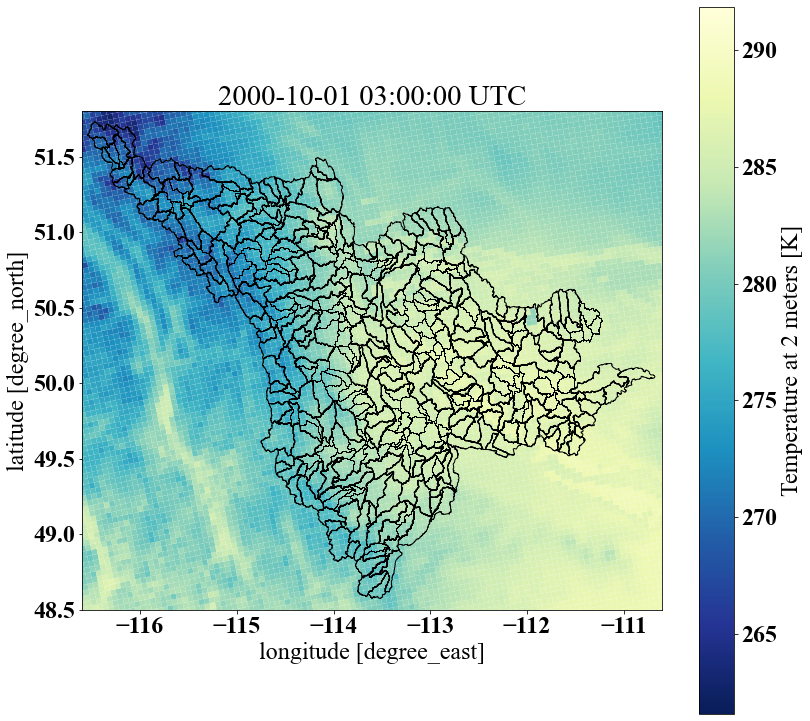

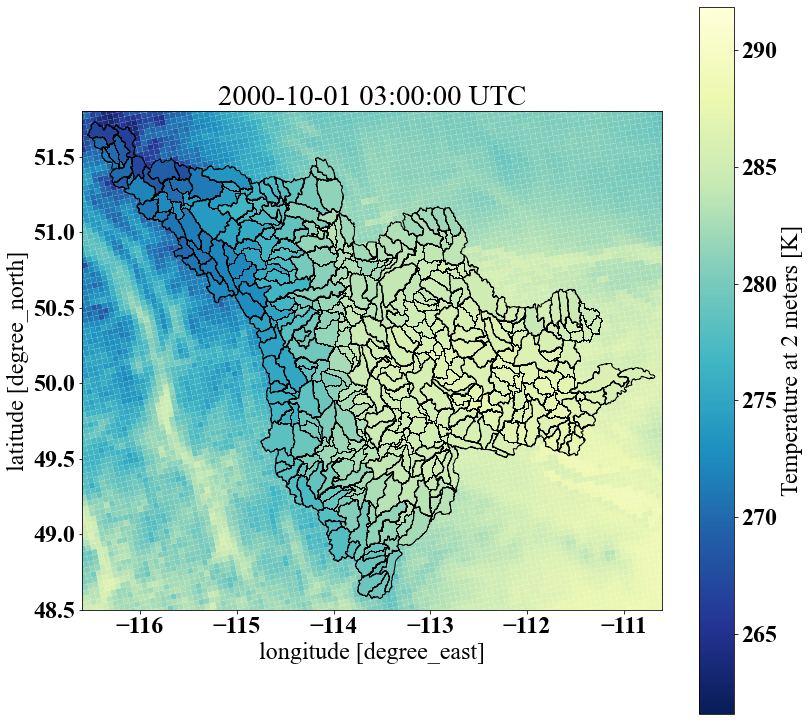

In [4]:
# visualize the result
import geopandas as gpd
import xarray as xr
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from datetime import datetime

import matplotlib
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)



# visualize the original netCDF for the first file, first time step
shp_source = gpd.read_file(cndx.temp_dir+ cndx.case_name + '_source_shapefile.shp') # load the target shapefile
# load the infromation on the
nc_names = sorted(glob.glob (cndx.source_nc))
ds       = xr.open_dataset(nc_names[0]) # the first netcdf file
print(ds.T2)


time_str = "2000-10-01 03:00:00 UTC"


T2       = np.array(ds.T2 [3,:,:]).flatten() # the first time frame of the first 
lat      = np.array(ds.XLAT).flatten()  # the first time frame of the first 
lon      = np.array(ds.XLONG).flatten()  # the first time frame of the first 

lat_shp = shp_source ['lat_s']
lon_shp = shp_source ['lon_s']
idx = np.zeros(len(lat_shp))
value = np.zeros(len(lat_shp))

for i in np.arange(len(lat_shp)):
    # find the row of the shapefile that is closes to the point
    diff = abs(lat-lat_shp[i])+ abs(lon-lon_shp[i])
    temp = np.where(diff == np.min(diff))
    idx[i] = temp[0].astype(int)
    a = idx[i]
    value[i] = T2 [a.astype(int)]


shp_source ['value'] = value

# # create the colorbar
norm = colors.Normalize(vmin=shp_source.value.min(), vmax=shp_source.value.max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='YlGnBu_r')

# plot
fig, axes = plt.subplots(1,1,figsize=(13,13))

# with no normalization
shp_source.plot(column='value', cmap='YlGnBu_r', legend=False, ax=axes)

# add colorbar
ax_cbar = fig.colorbar(cbar, ax=axes)
# add label for the colorbar
ax_cbar.set_label('Temperature at 2 meters [K]')

plt.xlim([-116.6 , -110.6 ])
plt.ylim([48.5 , 51.8 ])

plt.xlabel('longitude [degree_east]')
plt.ylabel('latitude [degree_north]')
plt.title(time_str)

shp_target = gpd.read_file(cndx.temp_dir+ cndx.case_name + '_sink_shapefile.shp') # load the target shapefile
shp_target.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 1, ax = axes)


plt.savefig('../fig/Example2_A.eps')


#

# visualize the remapped netCDF for the first file, first time step
# target nc file
nc_names = sorted(glob.glob (cndx.output_dir + cndx.case_name + '*.nc'))
ds       = xr.open_dataset(nc_names[0]) # the first netcdf file
values   = ds.T2 [3,:] # the first time frame of the first 
IDs      = ds.ID [:] # get the ID
# create a data frame for the model simulation
df = pd.DataFrame()
df ['value'] = values
df ['ID_t']    = IDs  # .astype(int)
df = df.sort_values (by = 'ID_t')
# load the shape file target that is generated by candex (with consistent IDs)
shp_target = gpd.read_file(cndx.temp_dir+ cndx.case_name + '_sink_shapefile.shp') # load the target shapefile
shp_target ['ID_t'] = shp_target ['ID_t'].astype(float)
shp_target = shp_target.sort_values(by='ID_t')# sort on values
shp_target = pd.merge_asof(shp_target, df, on='ID_t', direction='nearest')
shp_target = shp_target.set_geometry('geometry') #bring back the geometry filed; pd to gpd


# plotting

# # create the colorbar
norm = colors.Normalize(vmin=shp_source.value.min(), vmax=shp_source.value.max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='YlGnBu_r')

# plot
fig, axes = plt.subplots(1,1,figsize=(13,13))

# with no normalization
shp_source.plot(column='value', cmap='YlGnBu_r', legend=False, ax=axes)

# add colorbar
ax_cbar = fig.colorbar(cbar, ax=axes)
# add label for the colorbar
ax_cbar.set_label('Temperature at 2 meters [K]')

plt.xlim([-116.6 , -110.6 ])
plt.ylim([48.5 , 51.8 ])

plt.xlabel('longitude [degree_east]')
plt.ylabel('latitude [degree_north]')
plt.title(time_str)

shp_target.plot(column= 'value', cmap='YlGnBu_r', edgecolor='k',linewidth = 1, ax = axes , vmin = np.min(T2), vmax = np.max(T2))#, legend=True)

plt.savefig('../fig/Example2_B.eps')


